# Priprema podataka i treniranje modela

U ovoj skripti se vrsi priprema podataka za masinsko ucenje i treniranje regresionog modela. Output ovog programa je model predikcije sacuvan u pickle fajlu. 

## I Obrada podataka

In [1]:
# Uvozim neophodne module za obradu podataka.

import pickle
import pandas as pd 

In [2]:
# Ucitavam csv fajl u dataframe.

df = pd.read_csv('filmovi.csv')
df.head()

# with open('filmovi_df.pickle', 'rb') as ulaz:
#     df = pickle.load(ulaz)

,Unnamed: 0,id_filma,zanr,id_rezisera,id_glumca1,id_glumca2,ocena,mesec_izlaska,br_oskara_rezisera,br_dr_nagrada_rezisera,br_oskara_glumca1,br_dr_nagrada_glumca1,br_oskara_glumca2,br_dr_nagrada_glumca2
0,0,tt1375666,"Action, Adventure, Sci-Fi",nm0634240,nm0000138,nm0330687,8.8,July,5,139,1,99,0,22
1,1,tt1345836,"Action, Adventure",nm0634240,nm0000288,nm0362766,8.4,July,5,139,1,78,1,18
2,2,tt0816692,"Adventure, Drama, Sci-Fi",nm0634240,nm0000190,nm0004266,8.6,November,5,139,1,48,1,68
3,3,tt1853728,"Drama, Western",nm0000233,nm0004937,nm0910607,8.4,January,2,165,1,50,2,83
4,4,tt0848228,"Action, Adventure, Sci-Fi",nm0923736,nm0000375,nm0262635,8.0,May,1,25,2,41,0,7


In [3]:
# Pravim kopiju dataframe-a pre implementiranja promena.

df_1 = df.copy()

In [4]:
# Odmah uklanjam kolone koje nisu potrebne radi boljeg pregleda podataka.

df_1.drop(columns=['Unnamed: 0', 'id_filma', 'id_rezisera', 'id_glumca1', 'id_glumca2'], axis=1, inplace=True)

In [5]:
# Proveravam postojanje null vrednosti. 

df_1.isnull().sum()

zanr                      0
ocena                     0
mesec_izlaska             6
br_oskara_rezisera        0
br_dr_nagrada_rezisera    0
br_oskara_glumca1         0
br_dr_nagrada_glumca1     0
br_oskara_glumca2         0
br_dr_nagrada_glumca2     0
dtype: int64

Postoji 6 redova/naslova bez inputa za mesec_izlaska. S obzirom da je u pitanju mali broj u odnosu na ukupan broj opservacija, mogu ukloniti date redove.

In [6]:
# Uklanjam redove sa null vrednostima.

df_1.dropna(axis=0, inplace=True)

In [7]:
# Uvid u tipove podataka u datasetu

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2232
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zanr                    2227 non-null   object 
 1   ocena                   2227 non-null   float64
 2   mesec_izlaska           2227 non-null   object 
 3   br_oskara_rezisera      2227 non-null   int64  
 4   br_dr_nagrada_rezisera  2227 non-null   int64  
 5   br_oskara_glumca1       2227 non-null   int64  
 6   br_dr_nagrada_glumca1   2227 non-null   int64  
 7   br_oskara_glumca2       2227 non-null   int64  
 8   br_dr_nagrada_glumca2   2227 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 174.0+ KB


Vidim da imam 2 kolone tipa object. Posto model radi iskljucivo sa numerickim podacima, potrebno je konvertovati sve kategoricke varijable u numericke. 

In [8]:
# U koloni "mesec_izlaska" zamenjujem tekstualne vrednosti meseca u numericke vrednosti.

mapa_meseci = {
            "January" : 1, 
            "February" : 2, 
            "March" : 3, 
            "April" : 4, 
            "May" : 5,
            "June" : 6, 
            "July" : 7, 
            "August" : 8, 
            "September" : 9, 
            "October" : 10, 
            "November" : 11, 
            "December" : 12
            }

df_1 = df_1.replace({'mesec_izlaska': mapa_meseci})

df_1.head()

,zanr,ocena,mesec_izlaska,br_oskara_rezisera,br_dr_nagrada_rezisera,br_oskara_glumca1,br_dr_nagrada_glumca1,br_oskara_glumca2,br_dr_nagrada_glumca2
0,"Action, Adventure, Sci-Fi",8.8,7,5,139,1,99,0,22
1,"Action, Adventure",8.4,7,5,139,1,78,1,18
2,"Adventure, Drama, Sci-Fi",8.6,11,5,139,1,48,1,68
3,"Drama, Western",8.4,1,2,165,1,50,2,83
4,"Action, Adventure, Sci-Fi",8.0,5,1,25,2,41,0,7


In [9]:
# S obzirom da zanr takodje predstavlja kategoricku varijablu, pravim "dummy" kolone za svaki zanr. 

df_zanrovi = df_1['zanr'].str.get_dummies(sep=', ')
df_2 = pd.concat([df_1.drop(['zanr'], axis=1), df_zanrovi], axis=1)
df_2.head()

,ocena,mesec_izlaska,br_oskara_rezisera,br_dr_nagrada_rezisera,br_oskara_glumca1,br_dr_nagrada_glumca1,br_oskara_glumca2,br_dr_nagrada_glumca2,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,8.8,7,5,139,1,99,0,22,1,1,...,0,0,0,0,0,1,0,0,0,0
1,8.4,7,5,139,1,78,1,18,1,1,...,0,0,0,0,0,0,0,0,0,0
2,8.6,11,5,139,1,48,1,68,0,1,...,0,0,0,0,0,1,0,0,0,0
3,8.4,1,2,165,1,50,2,83,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.0,5,1,25,2,41,0,7,1,1,...,0,0,0,0,0,1,0,0,0,0


## II Eksplorativna analiza podataka

In [10]:
# Uvozim neophodne module za graficko predstavljanje podataka.

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [11]:
# Osnovni statistike nad podacima

pd.set_option('display.precision', 3)
df_2.describe()

,ocena,mesec_izlaska,br_oskara_rezisera,br_dr_nagrada_rezisera,br_oskara_glumca1,br_dr_nagrada_glumca1,br_oskara_glumca2,br_dr_nagrada_glumca2,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
count,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,...,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,2227.000,2227.0,2227.000,2227.000
mean,6.349,6.599,0.468,15.910,0.597,24.599,0.407,17.171,0.296,0.209,...,0.140,0.023,0.003,0.110,0.147,0.085,0.014,0.2,0.013,0.006
std,0.897,3.383,1.073,28.566,1.093,27.826,0.920,23.852,0.457,0.407,...,0.347,0.150,0.056,0.313,0.354,0.279,0.119,0.4,0.113,0.079
min,1.400,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
25%,5.800,4.000,0.000,0.000,0.000,4.000,0.000,2.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
50%,6.400,7.000,0.000,5.000,0.000,14.000,0.000,7.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
75%,7.000,10.000,0.000,16.500,1.000,37.000,1.000,22.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
max,8.800,12.000,8.000,253.000,9.000,174.000,9.000,174.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000


In [12]:
# Stampam koeficijente korelacije izmedju nezavisnih i zavisne varijable.

korelacije = df_2.corr(method='pearson')
korelacije.style.background_gradient().set_precision(2)

,ocena,mesec_izlaska,br_oskara_rezisera,br_dr_nagrada_rezisera,br_oskara_glumca1,br_dr_nagrada_glumca1,br_oskara_glumca2,br_dr_nagrada_glumca2,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
ocena,1.00,0.09,0.25,0.32,0.18,0.20,0.17,0.18,-0.05,0.07,0.09,0.23,-0.05,0.00,0.28,-0.05,-0.09,0.11,-0.27,0.05,0.04,-0.12,0.01,-0.00,0.07,-0.16,0.05,0.03
mesec_izlaska,0.09,1.00,0.01,0.06,0.03,0.06,0.03,0.02,-0.05,0.00,0.01,0.06,-0.00,0.02,0.04,0.03,-0.02,0.01,-0.00,0.04,0.01,0.01,-0.03,-0.02,0.01,-0.02,0.01,-0.05
br_oskara_rezisera,0.25,0.01,1.00,0.63,0.19,0.25,0.18,0.25,-0.10,0.06,0.07,0.09,0.00,-0.03,0.14,0.01,0.01,0.06,-0.13,0.04,0.02,-0.05,0.02,-0.02,0.01,-0.07,0.02,0.01
br_dr_nagrada_rezisera,0.32,0.06,0.63,1.00,0.17,0.29,0.15,0.22,-0.10,-0.01,-0.05,0.14,-0.09,-0.02,0.21,-0.03,0.03,0.11,-0.12,0.05,0.02,-0.03,-0.01,-0.00,0.01,-0.05,0.03,0.05
br_oskara_glumca1,0.18,0.03,0.19,0.17,1.00,0.58,0.15,0.18,-0.02,-0.04,-0.07,0.10,-0.03,0.06,0.14,-0.04,-0.06,0.07,-0.15,-0.00,-0.01,-0.06,0.03,-0.02,0.01,0.02,-0.00,0.03
br_dr_nagrada_glumca1,0.20,0.06,0.25,0.29,0.58,1.00,0.19,0.25,-0.02,-0.03,-0.04,0.11,-0.03,0.05,0.17,-0.04,-0.05,0.06,-0.19,0.02,-0.01,-0.07,0.01,-0.02,0.02,-0.01,0.02,0.04
br_oskara_glumca2,0.17,0.03,0.18,0.15,0.15,0.19,1.00,0.56,-0.04,0.02,-0.01,0.08,-0.01,0.04,0.11,0.01,0.01,0.01,-0.13,0.02,0.02,-0.08,0.02,-0.01,0.05,-0.05,-0.02,0.03
br_dr_nagrada_glumca2,0.18,0.02,0.25,0.22,0.18,0.25,0.56,1.00,-0.01,0.05,0.02,0.06,-0.02,0.02,0.13,0.01,0.03,0.01,-0.18,-0.01,0.00,-0.10,0.02,0.01,0.02,-0.05,-0.03,0.06
Action,-0.05,-0.05,-0.10,-0.10,-0.02,-0.02,-0.04,-0.01,1.00,0.34,-0.02,-0.15,-0.22,0.15,-0.32,-0.10,0.01,-0.04,-0.15,-0.09,-0.04,-0.17,-0.25,0.22,-0.04,0.05,-0.04,0.01
Adventure,0.07,0.00,0.06,-0.01,-0.04,-0.03,0.02,0.05,0.34,1.00,0.38,-0.13,-0.01,-0.19,-0.34,0.15,0.13,-0.09,-0.16,-0.06,-0.03,-0.14,-0.21,0.15,-0.06,-0.20,-0.05,-0.01


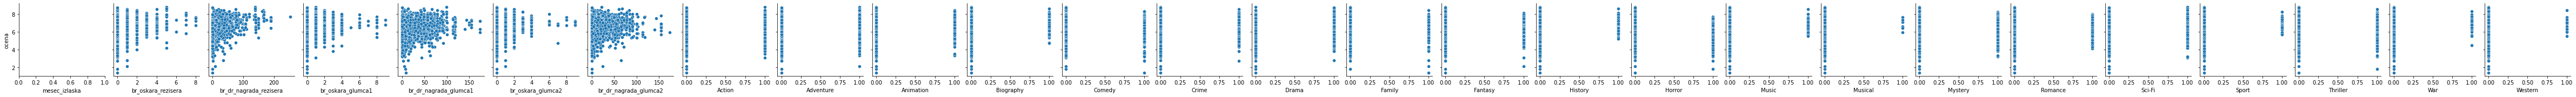

In [13]:
# Prikaz odnosa izmedju zavisne varijable i nezavisnih

odnosi = sns.pairplot(data=df_2, 
             x_vars=list(df_2.drop(['ocena'], axis=1).columns), 
             y_vars=['ocena'], 
             kind='scatter')

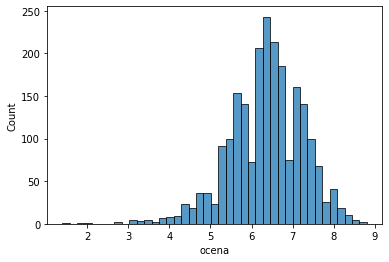

In [29]:
# Uvid u raspodelu promenljive 'ocena'

ax = sns.histplot(df_2['ocena'])

## III Treniranje modela linearne regresije

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import numpy as np

In [15]:
# Definisem finalni dataset, ulazne i izlaznu varijablu.
podaci_1 = df_2.copy()
target = "ocena"

X = podaci_1.drop(columns=[target], axis=1)
y = podaci_1[target]

In [16]:
print(list(X.columns))

['mesec_izlaska', 'br_oskara_rezisera', 'br_dr_nagrada_rezisera', 'br_oskara_glumca1', 'br_dr_nagrada_glumca1', 'br_oskara_glumca2', 'br_dr_nagrada_glumca2', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [17]:
# Sacuvacu feature-e (prediktore) modela u binarni fajl.

with open('prediktori_modela.pickle', 'wb') as izlaz:
    pickle.dump(list(X.columns), izlaz)

In [18]:
# Podela podataka na trening i test podatke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciranje objekat linearne regresije
model = LinearRegression()

# Fitovanje podataka u model (treniranje modela)
model.fit(X_train, y_train)

tacnost_modela = model.score(X_test, y_test)
print(f"Tacnost modela: {tacnost_modela:.3f}")

Tacnost modela: 0.265


In [19]:
# Primena modela nad test podacima
y_predikcije = model.predict(X_test)

In [20]:
# Evaluacija performansi modela

y_stvarne = y_test

# Kalkulacija srednje apsolutne greske
mae = mean_absolute_error(y_stvarne, y_predikcije)

# Kalkulacija srednje kvadratne greske
mse = mean_squared_error(y_stvarne, y_predikcije)
rmse = np.sqrt(mse)

# Kalkulacija maksimalne greske
max_greska = round(max_error(y_stvarne, y_predikcije), 1)

# Kalkulacija koeficijenta determinacije
koef_det = r2_score(y_stvarne, y_predikcije)

Koeficijenti nezavisnih varijabli:

Prediktor: mesec_izlaska, Ocena: 0.014
Prediktor: br_oskara_rezisera, Ocena: 0.034
Prediktor: br_dr_nagrada_rezisera, Ocena: 0.006
Prediktor: br_oskara_glumca1, Ocena: 0.047
Prediktor: br_dr_nagrada_glumca1, Ocena: 0.001
Prediktor: br_oskara_glumca2, Ocena: 0.059
Prediktor: br_dr_nagrada_glumca2, Ocena: -0.000
Prediktor: Action, Ocena: -0.027
Prediktor: Adventure, Ocena: 0.142
Prediktor: Animation, Ocena: 0.335
Prediktor: Biography, Ocena: 0.327
Prediktor: Comedy, Ocena: -0.071
Prediktor: Crime, Ocena: -0.027
Prediktor: Drama, Ocena: 0.303
Prediktor: Family, Ocena: -0.267
Prediktor: Fantasy, Ocena: -0.172
Prediktor: History, Ocena: 0.057
Prediktor: Horror, Ocena: -0.339
Prediktor: Music, Ocena: 0.046
Prediktor: Musical, Ocena: 0.492
Prediktor: Mystery, Ocena: -0.047
Prediktor: Romance, Ocena: -0.039
Prediktor: Sci-Fi, Ocena: 0.090
Prediktor: Sport, Ocena: 0.175
Prediktor: Thriller, Ocena: -0.169
Prediktor: War, Ocena: 0.158
Prediktor: Western, Ocena:

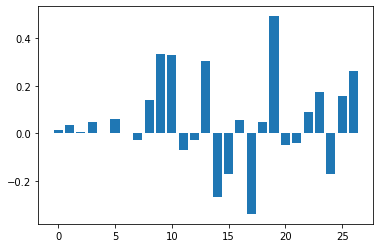

Izveštaj o performansama modela:

  Model: Linearna regresija
 _______________________________________________________
  Veličina test uzorka                       446
 _______________________________________________________
  Performanse modela:

  Koeficijent determinacije                0.265
  Srednja apsolutna greška                 0.583
  Srednja kvadratna greška                 0.595
  Maksimalna greška                          2.9




In [27]:
# Stampam koeficijente nezavisnih varijabli
ocene_vaznosti = model.coef_

print("Koeficijenti nezavisnih varijabli:\n")
for f,o in zip(list(X_train.columns), ocene_vaznosti):
    print(f"Prediktor: {f}, Ocena: {o:.3f}")
# plot feature importance
plt.bar([x for x in range(len(ocene_vaznosti))], ocene_vaznosti)
plt.show()


# Stampam rezultate ocena performansi modela
# Definisem objekat sa tekstom izvestaja radi mogucnosti formatiranja

ocene = {
        "1" : "Veličina test uzorka",
        "2" : "Koeficijent determinacije", 
        "3" : "Srednja apsolutna greška", 
        "4" : "Srednja kvadratna greška", 
        "5" : "Maksimalna greška"
        }

r = "Izveštaj o performansama modela:"
r += "\n\n"
r += " =======================================================\n"
r += "  Model: Linearna regresija\n"
r += " _______________________________________________________\n"
r += f"  {ocene['1']:<25} {len(y_predikcije):>20}\n"
r += " _______________________________________________________\n"
r += "  Performanse modela:\n\n"
r += f"  {ocene['2']:<25} {koef_det:>20.3f}\n"
r += f"  {ocene['3']:<25} {mae:>20.3f}\n"
r += f"  {ocene['4']:<25} {mse:>20.3f}\n"
r += f"  {ocene['5']:<25} {max_greska:>20}\n\n"
r += " =======================================================\n"
print(r)

In [22]:
# Cuvam model u pickle fajlu.
with open('reg_model.pickle', "wb") as izlaz:
    pickle.dump(model, izlaz) 